<a href="https://colab.research.google.com/github/Deb052024/Text-Analytics/blob/main/Tweet_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('/content/twitter_disaster.csv')

In [3]:
df.describe()

,id,target
count,7613.000000,7613.00000
mean,5441.934848,0.42966
std,3137.116090,0.49506
min,1.000000,0.00000
25%,2734.000000,0.00000
50%,5408.000000,0.00000
75%,8146.000000,1.00000
max,10873.000000,1.00000


In [4]:
df.shape

(7613, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [6]:
import nltk


In [7]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [8]:
from nltk import word_tokenize, sent_tokenize

In [9]:
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

nltk.download("wordnet")
nltk.download("omw-1.4")

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

**Clean text data by removing special characters, URLs, and punctuation**

In [10]:

import re

def clean_text(text):
    # Remove URLs
    text = re.sub(r'http\S+', '', text)

    # Remove special characters and punctuation
    text = re.sub(r'[^\w\s]', '', text)

    return text

df['cleaned_text'] = df['text'].apply(clean_text)

In [11]:
df['cleaned_text']

,cleaned_text
0,Our Deeds are the Reason of this earthquake Ma...
1,Forest fire near La Ronge Sask Canada
2,All residents asked to shelter in place are be...
3,13000 people receive wildfires evacuation orde...
4,Just got sent this photo from Ruby Alaska as s...
...,...
7608,Two giant cranes holding a bridge collapse int...
7609,aria_ahrary TheTawniest The out of control wil...
7610,M194 0104 UTC5km S of Volcano Hawaii
7611,Police investigating after an ebike collided w...


**Clean keyword and location column  data by removing special characters, URLs, and punctuation**

In [12]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import nltk
from nltk import word_tokenize, sent_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import re
warnings.filterwarnings('ignore')
df=pd.read_csv('/content/twitter_disaster.csv')
df.describe()
df.shape
df.info()
nltk.download('punkt')

nltk.download("wordnet")
nltk.download("omw-1.4")


def clean_text(text):
    # Remove URLs
    text = re.sub(r'http\S+', '', text)

    # Remove special characters and punctuation
    text = re.sub(r'[^\w\s]', '', text)

    return text

df['cleaned_text'] = df['text'].apply(clean_text)
#df['cleaned_text']

#Clean keyword column
def clean_keyword(keyword):
    if isinstance(keyword, str):
        keyword = re.sub(r'http\S+', '', keyword)
        keyword = re.sub(r'[^\w\s]', '', keyword)
        return keyword
    else:
        return keyword
df['cleaned_keyword'] = df['keyword'].apply(clean_keyword)

#Clean location column
def clean_location(location):
    if isinstance(location, str):
        location = re.sub(r'http\S+', '', location)
        location = re.sub(r'[^\w\s]', '', location)
        return location
    else:
        return location

df['cleaned_location'] = df['location'].apply(clean_location)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


**Replace the blank ' ' and NAN  values of keyword and location with the maximum occuring values of the respective column on the data frame**

In [13]:
# Find the most frequent value in 'cleaned_keyword' and 'cleaned_location'
keyword_mode = df['keyword'].mode()
location_mode = df['location'].mode()

# Replace blank spaces and NaN values with the mode
df['cleaned_keyword'] = df['cleaned_keyword'].replace([' ', np.nan], keyword_mode[0])
df['cleaned_location'] = df['cleaned_location'].replace([' ', np.nan], location_mode[0])

In [ ]:
df

,id,keyword,location,text,target,cleaned_text,cleaned_keyword,cleaned_location
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,Our Deeds are the Reason of this earthquake Ma...,fatalities,USA
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,Forest fire near La Ronge Sask Canada,fatalities,USA
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,All residents asked to shelter in place are be...,fatalities,USA
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,13000 people receive wildfires evacuation orde...,fatalities,USA
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,Just got sent this photo from Ruby Alaska as s...,fatalities,USA
...,...,...,...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1,Two giant cranes holding a bridge collapse int...,fatalities,USA
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1,aria_ahrary TheTawniest The out of control wil...,fatalities,USA
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,M194 0104 UTC5km S of Volcano Hawaii,fatalities,USA
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1,Police investigating after an ebike collided w...,fatalities,USA


In [14]:
df['location'].value_counts()

,count
location,
USA,104
New York,71
United States,50
London,45
Canada,29
...,...
"MontrÌ©al, QuÌ©bec",1
Montreal,1
"ÌÏT: 6.4682,3.18287",1


**Generate the cleaned data set with keyword,location and text columns along with id,target**

In [15]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import nltk
from nltk import word_tokenize, sent_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import re

warnings.filterwarnings('ignore')

# Assuming 'twitter_disaster.csv' is in your current working directory or you've mounted your Google Drive and provided correct path
df = pd.read_csv('/content/twitter_disaster.csv')

# Download required NLTK data
nltk.download('punkt')
nltk.download("wordnet")
nltk.download("omw-1.4")

def clean_text(text):
    text = re.sub(r'http\S+', '', str(text))  # Convert to string to handle potential non-string values
    text = re.sub(r'[^\w\s]', '', text)
    return text

df['cleaned_text'] = df['text'].apply(clean_text)

def clean_keyword(keyword):
    if isinstance(keyword, str):
        keyword = re.sub(r'http\S+', '', keyword)
        keyword = re.sub(r'[^\w\s]', '', keyword)
        return keyword
    else:
        return keyword

df['cleaned_keyword'] = df['keyword'].apply(clean_keyword)

def clean_location(location):
    if isinstance(location, str):
        location = re.sub(r'http\S+', '', location)
        location = re.sub(r'[^\w\s]', '', location)
        return location
    else:
        return location

df['cleaned_location'] = df['location'].apply(clean_location)

# Create df1 with specified columns
df1 = df[['id', 'target', 'cleaned_keyword', 'cleaned_location', 'cleaned_text']]
df1 = df1.rename(columns={'cleaned_keyword': 'keyword', 'cleaned_location': 'location', 'cleaned_text': 'text'})

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [16]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

**Generate a bar plot of the top 6 most frequent words in keywords with different colors**

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


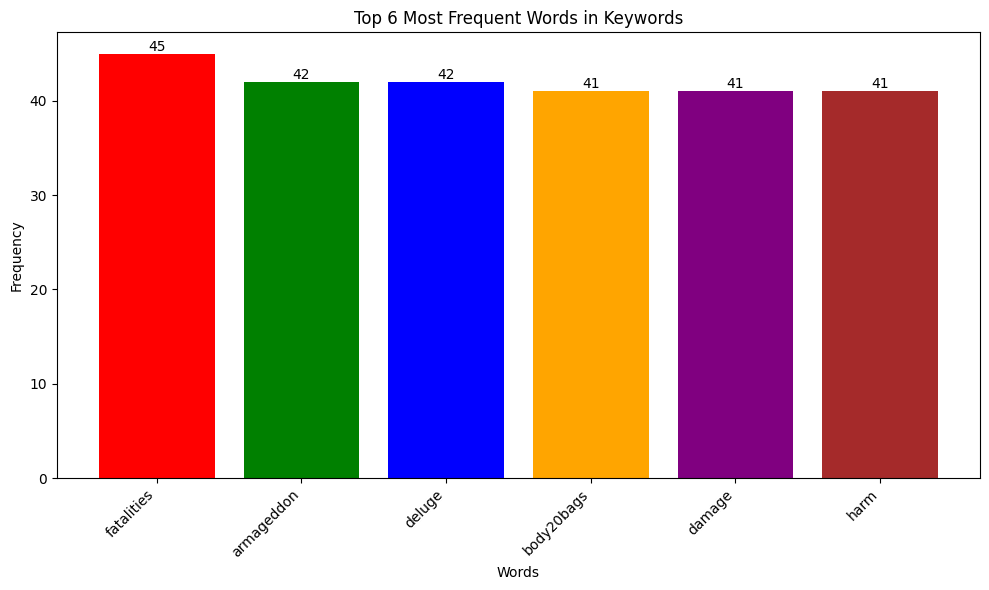

In [17]:


nltk.download('punkt_tab')
from collections import Counter

# Assuming 'df1' is your DataFrame and 'keyword' column exists
keywords = df1['keyword'].dropna().astype(str).str.cat(sep=' ')
words = nltk.word_tokenize(keywords)
word_counts = Counter(words)
top_6_words = word_counts.most_common(6)

words = [word for word, count in top_6_words]
counts = [count for word, count in top_6_words]

plt.figure(figsize=(10, 6))
bars = plt.bar(words, counts, color=['red', 'green', 'blue', 'orange', 'purple', 'brown'])
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 6 Most Frequent Words in Keywords')
plt.xticks(rotation=45, ha='right')

# Add frequency labels above each bar
for bar, count in zip(bars, counts):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, count, ha='center', va='bottom')
plt.tight_layout()
plt.show()

In [18]:
df1['keyword'].value_counts()

,count
keyword,
fatalities,45
deluge,42
armageddon,42
sinking,41
damage,41
...,...
forest20fire,19
epicentre,12
threat,11


**Generate a bar plot of the top 6 most frequent words in keywords with different colors for top  6 six locations**

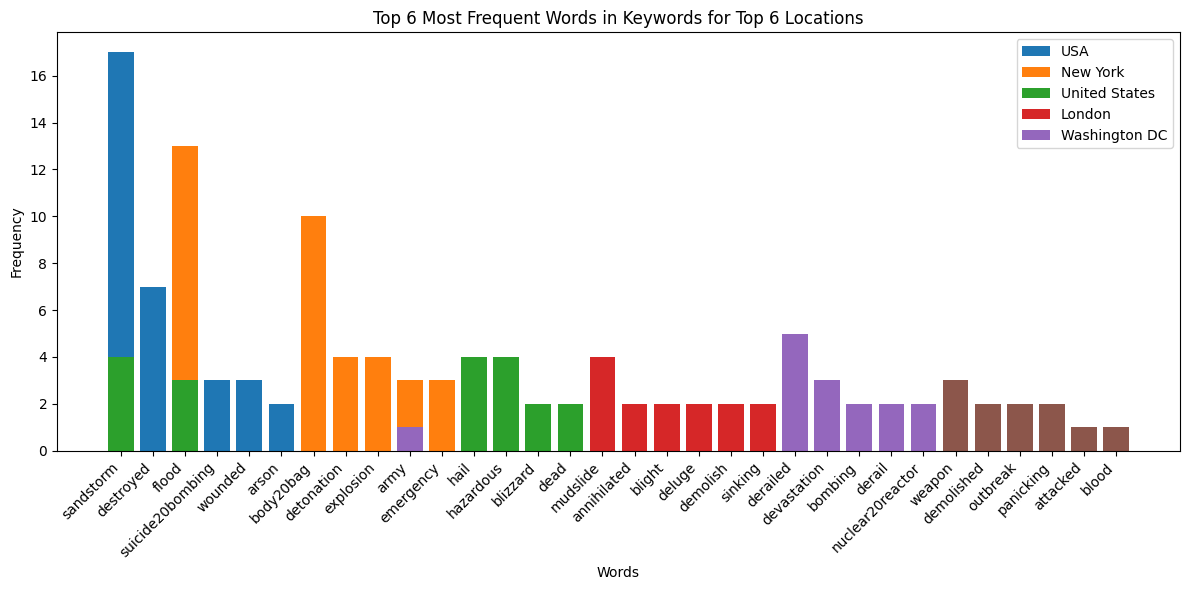

In [19]:


import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Assuming df1 is already defined as in your provided code

top_locations = df1['location'].value_counts().nlargest(6).index

plt.figure(figsize=(12, 6))

for i, location in enumerate(top_locations):
    keywords = df1[df1['location'] == location]['keyword'].dropna().astype(str).str.cat(sep=' ')
    words = nltk.word_tokenize(keywords)
    word_counts = Counter(words)
    top_6_words = word_counts.most_common(6)
    words = [word for word, count in top_6_words]
    counts = [count for word, count in top_6_words]

    plt.bar(words, counts, label=location, color=plt.cm.get_cmap('tab10')(i))


plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 6 Most Frequent Words in Keywords for Top 6 Locations')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

In [20]:
df1['location'].value_counts()

,count
location,
USA,108
New York,71
United States,50
London,46
Washington DC,40
...,...
MontrÌal QuÌbec,1
Montreal,1
ÌÏT 64682318287,1


**Visualize class distributions (disaster vs. non-disaster tweets) using histograms or bar plots**

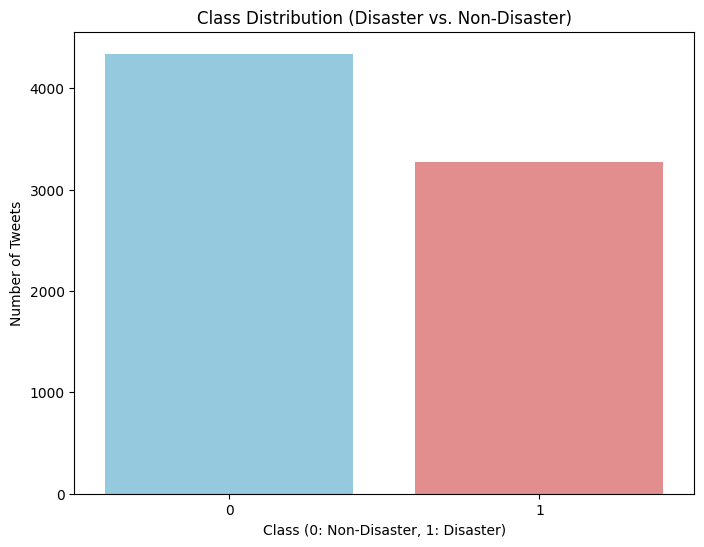

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the occurrences of each class
class_counts = df1['target'].value_counts()

# Create a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=class_counts.index, y=class_counts.values, palette=['skyblue', 'lightcoral'])
plt.title('Class Distribution (Disaster vs. Non-Disaster)')
plt.xlabel('Class (0: Non-Disaster, 1: Disaster)')
plt.ylabel('Number of Tweets')
plt.show()

**Key Tasks
Part 1: Data Exploration and Preparation**

In [22]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [23]:
import nltk

# Download the 'punkt_tab' data package
nltk.download('punkt_tab')
nltk.download('stopwords')
# Now, your code should work
from nltk import word_tokenize, sent_tokenize

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


**Analyze frequently occurring keywords and phrases in disaster-related tweets**

In [24]:

from collections import Counter

# Combine all text data for analysis
all_text = ' '.join(df1['text'].astype(str))

# Tokenize the text
tokens = word_tokenize(all_text.lower())

# Remove stop words (optional but recommended)
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
tokens = [w for w in tokens if not w in stop_words and w.isalnum()]

# Frequency distribution of words
word_freq = Counter(tokens)

# Print the most common words
print("Most common words:")
print(word_freq.most_common(20))  # Display the top 20 most frequent words


# Analyze frequent phrases (bigrams or trigrams)
from nltk import ngrams
bigrams = ngrams(tokens, 2)
bigram_freq = Counter(bigrams)

print("\nMost common bigrams:")
print(bigram_freq.most_common(10)) # Display the top 10 most frequent bigrams

trigrams = ngrams(tokens, 3)
trigram_freq = Counter(trigrams)
print("\nMost common trigrams:")
print(trigram_freq.most_common(10)) # Display the top 10 most frequent trigrams

Most common words:
[('like', 345), ('im', 299), ('amp', 298), ('fire', 250), ('get', 229), ('new', 224), ('via', 220), ('people', 196), ('news', 193), ('one', 192), ('dont', 191), ('video', 165), ('us', 164), ('2', 159), ('emergency', 157), ('disaster', 152), ('police', 140), ('would', 131), ('still', 129), ('body', 124)]

Most common bigrams:
[(('suicide', 'bomber'), 59), (('burning', 'buildings'), 58), (('gon', 'na'), 43), (('youtube', 'video'), 43), (('liked', 'youtube'), 42), (('northern', 'california'), 41), (('cross', 'body'), 39), (('oil', 'spill'), 39), (('wan', 'na'), 35), (('suicide', 'bombing'), 34)]

Most common trigrams:
[(('liked', 'youtube', 'video'), 42), (('suicide', 'bomber', 'detonated'), 30), (('northern', 'california', 'wildfire'), 29), (('latest', 'homes', 'razed'), 28), (('homes', 'razed', 'northern'), 28), (('pkk', 'suicide', 'bomber'), 28), (('bomber', 'detonated', 'bomb'), 28), (('razed', 'northern', 'california'), 27), (('16yr', 'old', 'pkk'), 27), (('old', '

**Extract features like TF-IDF scores, and sentiment analysis and avoid null.NAN values from the resulting data frame**

In [25]:


import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from textblob import TextBlob

# Assuming df1 is already created as in the previous code
keyword_mode = df['keyword'].mode()
location_mode = df['location'].mode()

# Replace blank spaces and NaN values with the mode
df['cleaned_keyword'] = df['cleaned_keyword'].replace([' ', np.nan], keyword_mode[0])
df['cleaned_location'] = df['cleaned_location'].replace([' ', np.nan], location_mode[0])





df1 = df[['id', 'target', 'cleaned_keyword', 'cleaned_location', 'cleaned_text']]
df1 = df1.rename(columns={'cleaned_keyword': 'keyword', 'cleaned_location': 'location', 'cleaned_text': 'text'})


# TF-IDF feature extraction
vectorizer = TfidfVectorizer(max_features=1000)  # Limit features for demonstration
tfidf_matrix = vectorizer.fit_transform(df1['text'])
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())
df1 = pd.concat([df1, tfidf_df], axis=1)


# Sentiment Analysis using TextBlob
def get_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

df1['sentiment'] = df1['text'].apply(get_sentiment)

# Display the updated DataFrame
print(df1.head())

   id  target     keyword location  \
0   1       1  fatalities      USA   
1   4       1  fatalities      USA   
2   5       1  fatalities      USA   
3   6       1  fatalities      USA   
4   7       1  fatalities      USA   

                                                text   05   10  100   11  \
0  Our Deeds are the Reason of this earthquake Ma...  0.0  0.0  0.0  0.0   
1              Forest fire near La Ronge Sask Canada  0.0  0.0  0.0  0.0   
2  All residents asked to shelter in place are be...  0.0  0.0  0.0  0.0   
3  13000 people receive wildfires evacuation orde...  0.0  0.0  0.0  0.0   
4  Just got sent this photo from Ruby Alaska as s...  0.0  0.0  0.0  0.0   

   11yearold  ...  youre  yours  yourself  youth  youtube  zone   û_   ûò  \
0        0.0  ...    0.0    0.0       0.0    0.0      0.0   0.0  0.0  0.0   
1        0.0  ...    0.0    0.0       0.0    0.0      0.0   0.0  0.0  0.0   
2        0.0  ...    0.0    0.0       0.0    0.0      0.0   0.0  0.0  0.0   
3     

**Extract features like TF-IDF scores, and sentiment analysis**

In [26]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from textblob import TextBlob

# Assuming df1 is already created as in the previous code

# TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)  # Limit features for demonstration
tfidf_matrix = vectorizer.fit_transform(df1['text'].astype(str))  # Convert to string
feature_names = vectorizer.get_feature_names_out()

# Ensure unique column names for TF-IDF features
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=[f"tfidf_{name}" for name in feature_names])
df1 = df1.loc[:, ~df1.columns.duplicated()]
df1 = pd.concat([df1, tfidf_df], axis=1)


# Sentiment Analysis
def get_sentiment(text):
    analysis = TextBlob(str(text))  # Handle potential non-string values
    return analysis.sentiment.polarity

df1['sentiment_polarity'] = df1['text'].apply(get_sentiment)

print(df1.head())

   id  target     keyword location  \
0   1       1  fatalities      USA   
1   4       1  fatalities      USA   
2   5       1  fatalities      USA   
3   6       1  fatalities      USA   
4   7       1  fatalities      USA   

                                                text   05   10  100   11  \
0  Our Deeds are the Reason of this earthquake Ma...  0.0  0.0  0.0  0.0   
1              Forest fire near La Ronge Sask Canada  0.0  0.0  0.0  0.0   
2  All residents asked to shelter in place are be...  0.0  0.0  0.0  0.0   
3  13000 people receive wildfires evacuation orde...  0.0  0.0  0.0  0.0   
4  Just got sent this photo from Ruby Alaska as s...  0.0  0.0  0.0  0.0   

   11yearold  ...  tfidf_ûpolitics  tfidf_ûïa  tfidf_ûïhatchet  \
0        0.0  ...              0.0        0.0              0.0   
1        0.0  ...              0.0        0.0              0.0   
2        0.0  ...              0.0        0.0              0.0   
3        0.0  ...              0.0        0.0     

**With lemmatization for sentiment analysis and separate between Diasaster and Non Disaster related tweets and generate a new column namely sentiment_words and mention it as yes in case disaster and no in case of non disaster tweet based on sentiment analysis**

In [27]:
import nltk
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob

# Download necessary NLTK data (if not already downloaded)
nltk.download('wordnet')
nltk.download('omw-1.4')

lemmatizer = WordNetLemmatizer()

def get_sentiment_words(text):
    # Tokenize the text
    tokens = nltk.word_tokenize(text)
    # Lemmatize the tokens
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    # Perform sentiment analysis on the lemmatized text
    analysis = TextBlob(" ".join(lemmatized_tokens))
    sentiment_score = analysis.sentiment.polarity
    # Classify sentiment into disaster or non-disaster based on a threshold (adjust as needed)
    return "yes" if sentiment_score > 0.1 else "no"


df1['sentiment_words'] = df1.apply(lambda row: get_sentiment_words(row['text']) if row['target'] == 1 else ("no" if row['target'] == 0 else None), axis=1)
print(df1.head(15))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


    id  target     keyword location  \
0    1       1  fatalities      USA   
1    4       1  fatalities      USA   
2    5       1  fatalities      USA   
3    6       1  fatalities      USA   
4    7       1  fatalities      USA   
5    8       1  fatalities      USA   
6   10       1  fatalities      USA   
7   13       1  fatalities      USA   
8   14       1  fatalities      USA   
9   15       1  fatalities      USA   
10  16       1  fatalities      USA   
11  17       1  fatalities      USA   
12  18       1  fatalities      USA   
13  19       1  fatalities      USA   
14  20       1  fatalities      USA   

                                                 text   05   10  100   11  \
0   Our Deeds are the Reason of this earthquake Ma...  0.0  0.0  0.0  0.0   
1               Forest fire near La Ronge Sask Canada  0.0  0.0  0.0  0.0   
2   All residents asked to shelter in place are be...  0.0  0.0  0.0  0.0   
3   13000 people receive wildfires evacuation orde...  0.0  0.0  0.

In [ ]:
#Leverage pre-trained word embeddings bag of words for semantic meaning

import gensim.downloader as api

# Download pre-trained word embeddings (e.g., Word2Vec Google News)
wv = api.load('word2vec-google-news-300')

def get_embedding(text):
    tokens = nltk.word_tokenize(text.lower())
    embeddings = []
    for token in tokens:
        if token in wv:
            embeddings.append(wv[token])
    if embeddings:
        return np.mean(embeddings, axis=0)  # Average embeddings
    else:
        return np.zeros(300)  # Return zero vector if no words found in vocabulary

# Apply the embedding function to the 'text' column
df1['embeddings'] = df1['text'].apply(get_embedding)
print(df1.head())

[==================================================] 100.0% 1662.8/1662.8MB downloaded
   id  target     keyword location  \
0   1       1  fatalities      USA   
1   4       1  fatalities      USA   
2   5       1  fatalities      USA   
3   6       1  fatalities      USA   
4   7       1  fatalities      USA   

                                                text  \
0  Our Deeds are the Reason of this earthquake Ma...   
1              Forest fire near La Ronge Sask Canada   
2  All residents asked to shelter in place are be...   
3  13000 people receive wildfires evacuation orde...   
4  Just got sent this photo from Ruby Alaska as s...   

                                     lemmatized_text  sentiment  \
0  Our Deeds are the Reason of this earthquake Ma...    0.00000   
1              Forest fire near La Ronge Sask Canada    0.10000   
2  All resident asked to shelter in place are bei...   -0.01875   
3  13000 people receive wildfire evacuation order...    0.00000   
4  Just got 

In [ ]:
df1['lemmatized_text'].tail(20)

,lemmatized_text
7593,I just heard a really loud bang and everyone i...
7594,A gas thing just exploded and I heard scream a...
7595,NWS Flash Flood Warning Continued for Shelby C...
7596,RT LivingSafely NWS issue Severe Thunderstorm ...
7597,MH370 Aircraft debris found on La Reunion is f...
7598,Fatherofthree Lost Control of Car After Overta...
7599,13 Earthquake in 9Km Ssw Of Anza California iP...
7600,Evacuation order lifted for town of Roosevelt
7601,breaking LA Refugio oil spill may have been co...
7602,a siren just went off and it wasnt the Forney ...


**create a word cloud on the lemmatized text around the disaster related tweets**

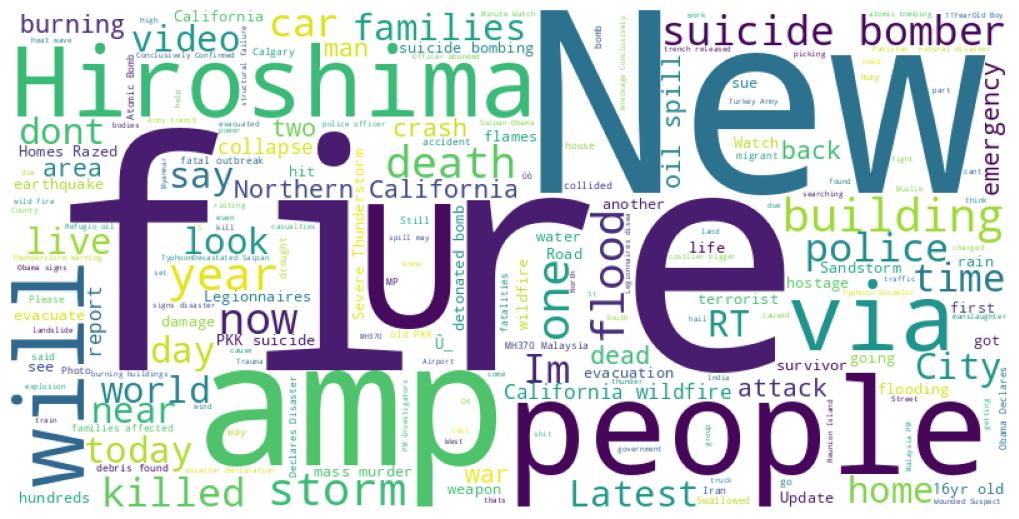

In [28]:

from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming df1 is your DataFrame and 'lemmatized_text' column contains the lemmatized text

# Filter for disaster-related tweets
disaster_tweets = df1[df1['target'] == 1]['text']

# Combine the lemmatized text from disaster tweets
disaster_text = " ".join(disaster_tweets)

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(disaster_text)

# Display the generated image:
plt.figure(figsize=(10, 5), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

**word cloud with text column**

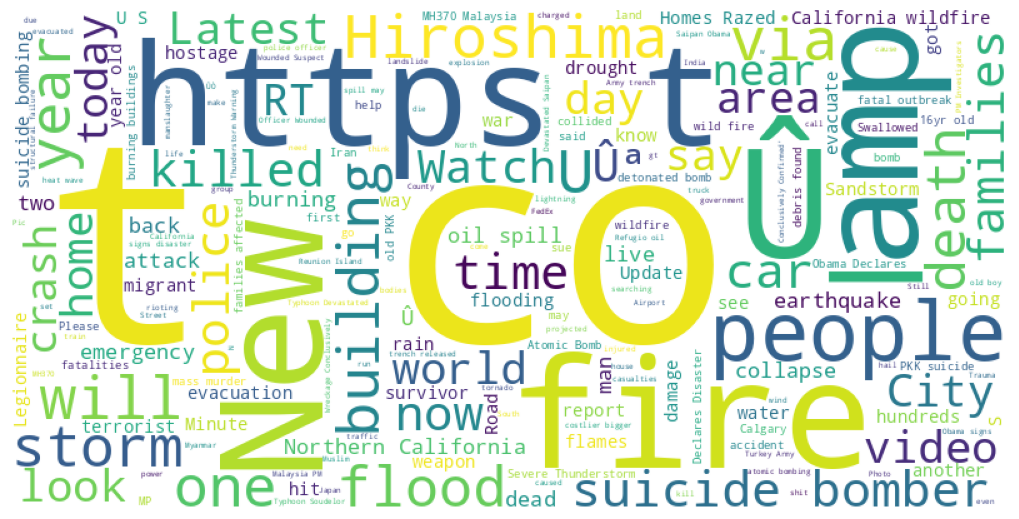

In [29]:
# Assuming df1 is your DataFrame and 'text' column contains the text
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Filter for disaster-related tweets
disaster_tweets = df[df['target'] == 1]['text']

# Combine the text from disaster tweets
disaster_text = " ".join(disaster_tweets.astype(str))

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(disaster_text)

# Display the generated image:
plt.figure(figsize=(10, 5), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

**Leverage pre-trained word embeddings (e.g., Word2Vec, GloVe) for semantic meaning**

In [ ]:
import numpy as np
import nltk
nltk.download('punkt')

# Replace with your actual embedding loading method
# This is a placeholder; you'll need to load embeddings from a file or a library
# without using gensim.  For example, using a pre-trained model from TensorFlow Hub.

# Example using a dictionary (replace with your actual embeddings)
embeddings_dict = {}
# ... Load your embeddings into embeddings_dict, where keys are words and values are vectors

def get_embedding(text):
    tokens = nltk.word_tokenize(text.lower())
    embeddings = []
    for token in tokens:
        if token in embeddings_dict:
            embeddings.append(embeddings_dict[token])
    if embeddings:
        return np.mean(embeddings, axis=0)  # Average embeddings
    else:
        return np.zeros(300)  # Return zero vector if no words found in vocabulary

# Example usage (assuming df1 is your DataFrame)
df['embeddings'] = df['text'].apply(get_embedding)
print(df.head())

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


   id keyword location                                               text  \
0   1     NaN      NaN  Our Deeds are the Reason of this #earthquake M...   
1   4     NaN      NaN             Forest fire near La Ronge Sask. Canada   
2   5     NaN      NaN  All residents asked to 'shelter in place' are ...   
3   6     NaN      NaN  13,000 people receive #wildfires evacuation or...   
4   7     NaN      NaN  Just got sent this photo from Ruby #Alaska as ...   

   target                                       cleaned_text cleaned_keyword  \
0       1  Our Deeds are the Reason of this earthquake Ma...      fatalities   
1       1              Forest fire near La Ronge Sask Canada      fatalities   
2       1  All residents asked to shelter in place are be...      fatalities   
3       1  13000 people receive wildfires evacuation orde...      fatalities   
4       1  Just got sent this photo from Ruby Alaska as s...      fatalities   

  cleaned_location  tweet_length  hashtags_present  num_

**Leverage pre-trained word embeddings (e.g., Word2Vec, GloVe) for semantic
meaning**

In [30]:
!pip install gensim

import gensim.downloader as api

# Load pre-trained word embeddings (e.g., Word2Vec Google News)
try:
    model = api.load("word2vec-google-news-300")
except Exception as e:
    print(f"Error loading word2vec-google-news-300: {e}")
    print("Trying to download a smaller model...")
    try:
        model = api.load("glove-twitter-25")
    except Exception as e:
        print(f"Error loading glove-twitter-25: {e}")
        print("Could not load any word embeddings.")
        model = None


if model:
    # Example usage: Find similar words
    similar_words = model.most_similar("disaster", topn=10)
    print("Words similar to 'disaster':", similar_words)

    # Example usage: Calculate word similarity
    similarity = model.similarity("disaster", "emergency")
    print("Similarity between 'disaster' and 'emergency':", similarity)


    # Integrate with your DataFrame (df1)
    def get_word_embedding(text):
        tokens = word_tokenize(text.lower())  # Tokenize the text
        # Remove words not in vocabulary
        tokens = [word for word in tokens if word in model.key_to_index]
        if tokens:  # Check if there are any valid tokens
          return np.mean(model[tokens], axis=0)
        else:
          return np.zeros(model.vector_size)  # Return a zero vector if no valid tokens are found

    df1['word_embedding'] = df1['text'].apply(get_word_embedding)

    print(df1.head())

[==================================================] 100.0% 1662.8/1662.8MB downloaded
Words similar to 'disaster': [('disasters', 0.7751654982566833), ('calamity', 0.7409838438034058), ('catastrophe', 0.7316239476203918), ('Disaster', 0.7234424352645874), ('diaster', 0.7086317539215088), ('disater', 0.6191920638084412), ('distaster', 0.5888047218322754), ('tragedy', 0.5871202945709229), ('natural_disasters', 0.5869818329811096), ('catastrophes', 0.5848628282546997)]
Similarity between 'disaster' and 'emergency': 0.47155938
   id  target     keyword location  \
0   1       1  fatalities      USA   
1   4       1  fatalities      USA   
2   5       1  fatalities      USA   
3   6       1  fatalities      USA   
4   7       1  fatalities      USA   

                                                text   05   10  100   11  \
0  Our Deeds are the Reason of this earthquake Ma...  0.0  0.0  0.0  0.0   
1              Forest fire near La Ronge Sask Canada  0.0  0.0  0.0  0.0   
2  All reside

What is TF-IDF? Term Frequency - Inverse Document Frequency (TF-IDF) is a widely used statistical method in natural language processing and information retrieval. It measures how important a term is within a document relative to a collection of documents.
**Incorporate additional features such as tweet length, hashtag presence, or user mentions**

In [31]:
import pandas as pd
import numpy as np
# ... (rest of your imports and code)

keyword_mode = df['keyword'].mode()
location_mode = df['location'].mode()



def extract_features(text):
    # Tweet length
    tweet_length = len(text)

    # Hashtag presence
    hashtags_present = 1 if '#' in text else 0

    # Number of hashtags
    num_hashtags = len(re.findall(r'#\w+', text))

    # User mentions
    user_mentions_present = 1 if '@' in text else 0
    num_mentions = len(re.findall(r'@\w+', text))

    return tweet_length, hashtags_present, num_hashtags, user_mentions_present, num_mentions

# Apply feature extraction to each tweet
df[['tweet_length', 'hashtags_present', 'num_hashtags', 'user_mentions_present', 'num_mentions']] = df['text'].apply(lambda x: pd.Series(extract_features(x)))

df[['tweet_length', 'hashtags_present', 'num_hashtags', 'user_mentions_present', 'num_mentions']].head(20)

,tweet_length,hashtags_present,num_hashtags,user_mentions_present,num_mentions
0,69,1,1,0,0
1,38,0,0,0,0
2,133,0,0,0,0
3,65,1,1,0,0
4,88,1,2,0,0
5,110,1,3,0,0
6,95,1,2,0,0
7,59,0,0,0,0
8,79,0,0,0,0
9,52,0,0,0,0


**Task 2: Model Selection and Training. Evaluate models suitable for text classification,  logistic regression, Train each model on the training data and evaluate performance using cross validation**

In [32]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer

# Assuming df1 is your DataFrame with 'text' and 'target' columns
X = df1['text']
y = df1['target']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# TF-IDF vectorization
vectorizer = TfidfVectorizer(max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)


# Model training and evaluation using cross-validation
models = {
    "Logistic Regression": LogisticRegression(),
    "Naive Bayes": MultinomialNB(),
    "Random Forest": RandomForestClassifier()
}

results = {}
for name, model in models.items():
    cv_scores = cross_val_score(model, X_train_vec, y_train, cv=5, scoring='accuracy')
    results[name] = {
        "cv_scores": cv_scores,
        "cv_mean": cv_scores.mean(),
        "cv_std": cv_scores.std()
    }
    print(f"Cross Validation Results for {name}: {cv_scores}")
    print(f"Mean Accuracy for {name}: {cv_scores.mean()}")
    print(f"Std for {name}: {cv_scores.std()}")

    model.fit(X_train_vec,y_train)
    y_pred = model.predict(X_test_vec)
    print(f"Test Accuracy for {name}: {accuracy_score(y_test, y_pred)}")
    print(classification_report(y_test,y_pred))

Cross Validation Results for Logistic Regression: [0.80706076 0.80377668 0.81444992 0.77668309 0.80213465]
Mean Accuracy for Logistic Regression: 0.8008210180623972
Std for Logistic Regression: 0.012788921168223787
Test Accuracy for Logistic Regression: 0.8095863427445831
              precision    recall  f1-score   support

           0       0.80      0.89      0.84       874
           1       0.82      0.71      0.76       649

    accuracy                           0.81      1523
   macro avg       0.81      0.80      0.80      1523
weighted avg       0.81      0.81      0.81      1523

Cross Validation Results for Naive Bayes: [0.80623974 0.80377668 0.80870279 0.79146141 0.79310345]
Mean Accuracy for Naive Bayes: 0.800656814449918
Std for Naive Bayes: 0.007032056849052144
Test Accuracy for Naive Bayes: 0.8049901510177282
              precision    recall  f1-score   support

           0       0.78      0.91      0.84       874
           1       0.85      0.66      0.74       6

**Assess model performance using metrics such as accuracy, precision, recall, and F1 score**

**Visualize results with confusion matrices, ROC curves, and precision-recall plots**

**Compare metrics across models to identify the best-performing model**

Cross Validation Results for Naive Bayes: [0.80623974 0.80377668 0.80870279 0.79146141 0.79310345]
Mean Accuracy for Naive Bayes: 0.800656814449918
Std for Naive Bayes: 0.007032056849052144
Test Accuracy for Naive Bayes: 0.8049901510177282
              precision    recall  f1-score   support

           0       0.78      0.91      0.84       874
           1       0.85      0.66      0.74       649

    accuracy                           0.80      1523
   macro avg       0.82      0.79      0.79      1523
weighted avg       0.81      0.80      0.80      1523

Cross Validation Results for Random Forest: [0.77093596 0.79146141 0.79885057 0.75205255 0.7816092 ]
Mean Accuracy for Random Forest: 0.7789819376026272
Std for Random Forest: 0.016415434400435063
Test Accuracy for Random Forest: 0.7793827971109653
              precision    recall  f1-score   support

           0       0.77      0.89      0.82       874
           1       0.81      0.63      0.71       649

    accuracy        

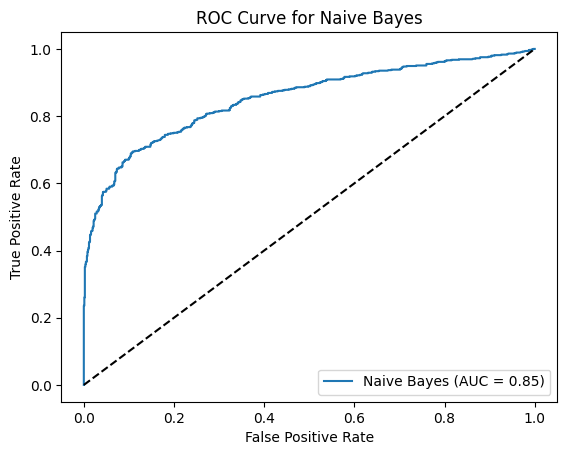

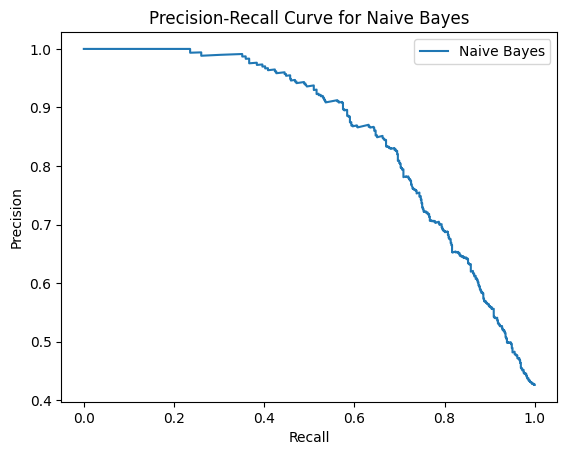

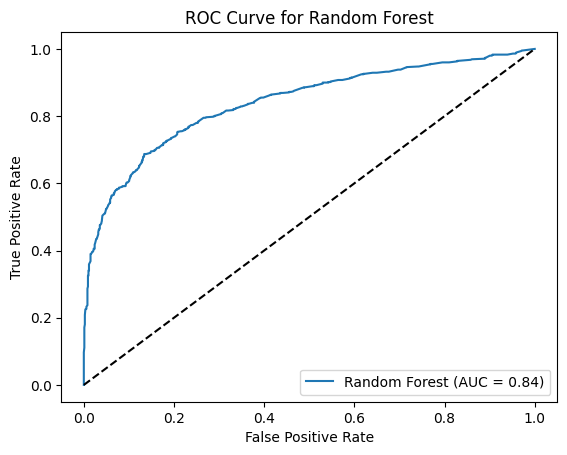

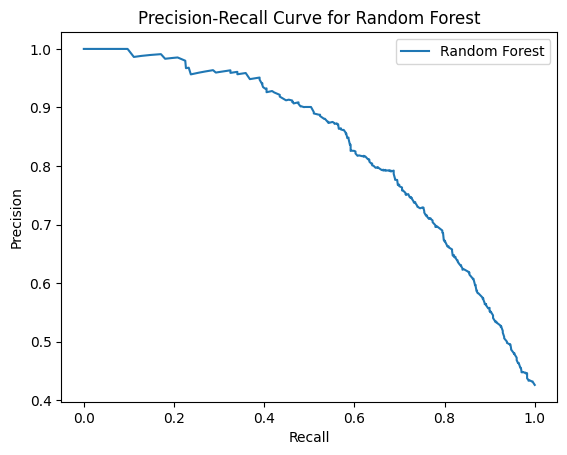

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import nltk
from nltk import word_tokenize, sent_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import re
from collections import Counter
from nltk.corpus import stopwords
from nltk import ngrams
from sklearn.feature_extraction.text import TfidfVectorizer
from textblob import TextBlob
import gensim.downloader as api
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve
from sklearn.preprocessing import label_binarize # needed for multi-class ROC curve

warnings.filterwarnings('ignore')

# ... (rest of your code)

# Model training and evaluation using cross-validation
models = {
    "Naive Bayes": MultinomialNB(),
    "Random Forest": RandomForestClassifier()
}

results = {}
for name, model in models.items():
    cv_scores = cross_val_score(model, X_train_vec, y_train, cv=5, scoring='accuracy')
    results[name] = {
        "cv_scores": cv_scores,
        "cv_mean": cv_scores.mean(),
        "cv_std": cv_scores.std()
    }
    print(f"Cross Validation Results for {name}: {cv_scores}")
    print(f"Mean Accuracy for {name}: {cv_scores.mean()}")
    print(f"Std for {name}: {cv_scores.std()}")

    model.fit(X_train_vec, y_train)
    y_pred = model.predict(X_test_vec)

    results[name].update({
        "accuracy": accuracy_score(y_test, y_pred),
        "classification_report": classification_report(y_test, y_pred),
        "confusion_matrix": confusion_matrix(y_test, y_pred)
    })

    # ROC Curve and AUC
    y_prob = model.predict_proba(X_test_vec)[:, 1] # probability for positive class
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    results[name]['roc_auc'] = roc_auc
    results[name]['fpr'] = fpr
    results[name]['tpr'] = tpr


    #Precision Recall Curve
    precision, recall, thresholds = precision_recall_curve(y_test,y_prob)
    results[name]['precision'] = precision
    results[name]['recall'] = recall
    print(f"Test Accuracy for {name}: {accuracy_score(y_test, y_pred)}")
    print(classification_report(y_test,y_pred))


#Visualizations
for name, metrics in results.items():
    print(f"Results for: {name}")
    print(f"Accuracy: {metrics['accuracy']}")
    print(f"Classification Report:\n{metrics['classification_report']}")
    print(f"Confusion Matrix:\n{metrics['confusion_matrix']}")

    plt.figure()
    plt.plot(metrics['fpr'],metrics['tpr'], label=f'{name} (AUC = {metrics["roc_auc"]:.2f})')
    plt.plot([0,1],[0,1],'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {name}')
    plt.legend(loc="lower right")

    plt.figure()
    plt.plot(metrics["recall"], metrics["precision"], label=name)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f"Precision-Recall Curve for {name}")
    plt.legend()

plt.show()

**Evaluate models suitable for text classification using RNN Neural network**

In [ ]:

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

# Assuming X_train_vec, X_test_vec, y_train, y_test are already defined

# Define the RNN model
model = Sequential()
model.add(Embedding(input_dim=X_train_vec.shape[1], output_dim=128))  # Adjust input_dim and output_dim as needed
model.add(LSTM(128))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_vec.toarray(), y_train, epochs=10, batch_size=32, validation_split=0.2) # Adjust epochs and batch size

# Evaluate the model
loss, accuracy = model.evaluate(X_test_vec.toarray(), y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

# Make predictions
y_pred_prob = model.predict(X_test_vec.toarray())
y_pred = (y_pred_prob > 0.5).astype(int) # Convert probabilities to class labels

# ... (rest of your evaluation code, e.g., confusion matrix, classification report)
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Epoch 1/10
153/153 ━━━━━━━━━━━━━━━━━━━━ 2077s 14s/step - accuracy: 0.5697 - loss: 0.6855 - val_accuracy: 0.5616 - val_loss: 0.6859
Epoch 2/10
119/153 ━━━━━━━━━━━━━━━━━━━━ 7:20 13s/step - accuracy: 0.5567 - loss: 0.6881

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-29-87bce207247e>", line 19, in <cell line: 19>
    model.fit(X_train_vec.toarray(), y_train, epochs=10, batch_size=32, validation_split=0.2) # Adjust epochs and batch size
  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler
    return fn(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 320, in fit
    logs = self.train_function(iterator)
  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/traceback_utils.py", line 150, in error_handler
    return fn(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/eager/polymorphic_function/polymorphic_function.py", line 833, in __call__
    result = self._call(*arg

TypeError: object of type 'NoneType' has no len()

**Vader Sentiment Analysis**

In [34]:

!pip install vaderSentiment

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

keyword_mode = df['keyword'].mode()
location_mode = df['location'].mode()

# Replace blank spaces and NaN values with the mode
df['cleaned_keyword'] = df['cleaned_keyword'].replace([' ', np.nan], keyword_mode[0])
df['cleaned_location'] = df['cleaned_location'].replace([' ', np.nan], location_mode[0])



df1 = df[['id', 'target', 'cleaned_keyword', 'cleaned_location', 'cleaned_text']]
df1 = df1.rename(columns={'cleaned_keyword': 'keyword', 'cleaned_location': 'location', 'cleaned_text': 'text'})


analyzer = SentimentIntensityAnalyzer()

def get_vader_sentiment(text):
    scores = analyzer.polarity_scores(text)
    return scores['compound']

df1['vader_sentiment'] = df1['text'].astype(str).apply(get_vader_sentiment)

print(df1.head())

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.5 MB/s eta 0:00:00
   id  target     keyword location  \
0   1       1  fatalities      USA   
1   4       1  fatalities      USA   
2   5       1  fatalities      USA   
3   6       1  fatalities      USA   
4   7       1  fatalities      USA   

                                                text  vader_sentiment  
0  Our Deeds are the Reason of this earthquake Ma...           0.2732  
1              Forest fire near La Ronge Sask Canada          -0.3400  
2  All residents asked to shelter in place are be...          -0.2960  
3  13000 people receive wildfires evacuation orde...           0.0000  
4  Just got sent this photo from Ruby Alaska as s...           0.0000  


**Validate the chosen model on the test dataset to evaluate its generalization**

Test Accuracy: 0.783322390019698
              precision    recall  f1-score   support

           0       0.77      0.89      0.83       874
           1       0.82      0.63      0.71       649

    accuracy                           0.78      1523
   macro avg       0.79      0.76      0.77      1523
weighted avg       0.79      0.78      0.78      1523

Confusion Matrix:
[[782  92]
 [238 411]]


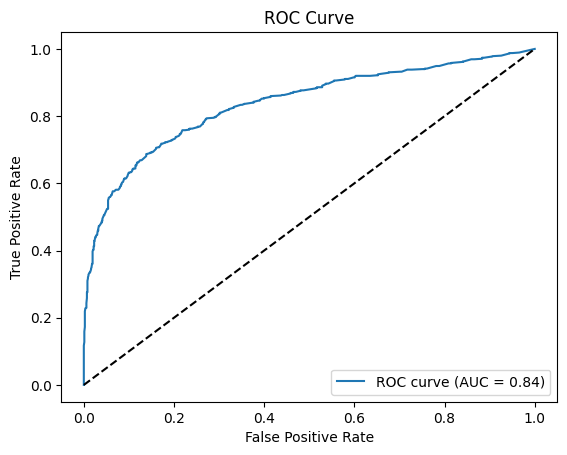

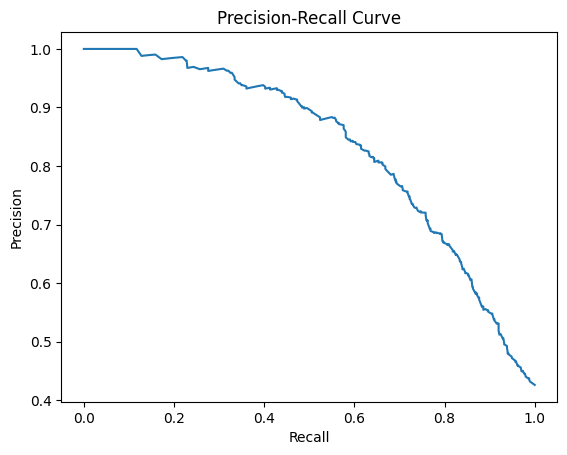

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve
import matplotlib.pyplot as plt
# Assuming X_test_vec, y_test, and the trained 'model' (e.g., LogisticRegression, RandomForestClassifier, etc.) are already defined

# ... (your existing code)


# Assuming 'model' is your best-performing model from the previous step

# Make predictions on the test set
y_pred = model.predict(X_test_vec)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# ROC Curve and AUC (for binary classification)
if len(np.unique(y_test)) == 2: #only for binary classification problems
    y_prob = model.predict_proba(X_test_vec)[:, 1]  # Probabilities for the positive class
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

# Precision-Recall Curve (for binary classification)
if len(np.unique(y_test)) == 2:
    precision, recall, thresholds = precision_recall_curve(y_test, y_prob)
    plt.figure()
    plt.plot(recall, precision)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.show()

**Pickle File generation**

In [35]:
import pickle

# Save the model
with open('disaster_tweet_model.pkl', 'wb') as f:
    pickle.dump(model, f)

# Save the vectorizer
with open('tfidf_vectorizer.pkl', 'wb') as f:
    pickle.dump(vectorizer, f)

**Deployment with Interactive Interface : o Serialize the trained model (e.g., using pickle)**
# o Use MLflow to manage the lifecycle of the machine learning model, including
# tracking, logging, and deployment.
# o Develop an interactive application using Streamlit to create a simple and accessible
# interface for users **

In [37]:
!pip install streamlit
import streamlit as st
import pickle
import numpy as np

# Load the saved model and vectorizer
with open('disaster_tweet_model.pkl', 'rb') as f:
    model = pickle.load(f)

with open('tfidf_vectorizer.pkl', 'rb') as f:
    vectorizer = pickle.load(f)

# Create the Streamlit app
st.title("Disaster Tweet Classifier")

# Input text area for the user
user_input = st.text_area("Enter a tweet:", "")

# Prediction button
if st.button("Predict"):
    if user_input:
        # Vectorize the input text
        input_vec = vectorizer.transform([user_input])

        # Make a prediction
        prediction = model.predict(input_vec)[0]

        # Display the prediction
        if prediction == 1:
            st.write("This tweet is likely about a disaster.")
        else:
            st.write("This tweet is likely not about a disaster.")
    else:
        st.write("Please enter a tweet.")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 56.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 85.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.0 MB/s eta 0:00:00


2025-01-21 07:14:42.428 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-21 07:14:42.571 
  command:

    streamlit run /usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-01-21 07:14:42.577 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-21 07:14:42.580 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-21 07:14:42.581 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-21 07:14:42.582 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-21 07:14:42.587 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-21 07:14:42.588 Session state does not 